<a href="https://colab.research.google.com/github/LeidyDaniela/AnalisisNumerico2020_2/blob/master/Trabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación del efecto de incentivos en la difusión de pequeñas centrales hidroeléctricas en Ecuador**

Para evaluar el efecto de esquemas de incentivos FIT y certificados CRE, se parte del diagrama causal general, el cual explica la dinámica del sistema de difusión de tecnologías de PCH en Ecuador, tal como se muestra en la siguiente imagen.

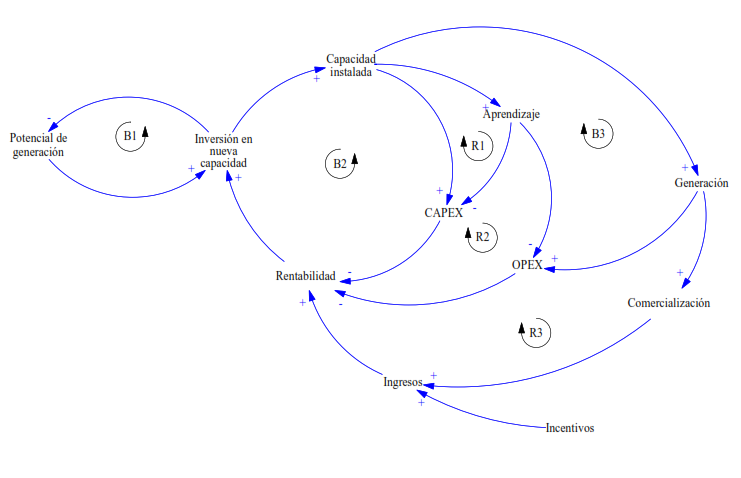

Se plantea 4 escenarios diferentes con el fin de apreciar el efecto de cada incentivo así como la ausencia y combinación de los mismos. La simulación de cada escenario se presenta a continuación 

**1. Caso Base**
---

En este caso solo se simulan los incentivos ya establecidos dentro de las normas y regulaciones en el sector eléctrico de Ecuador, dejando a un lado los incentivos por certificados CRE y el precio FIT.





In [3]:
pip install pysd 

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 194kB 6.3MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=42710 sha256=029092e5fb6e3aa1f73b51543a8a5204d08c1ee39bac30da1499f9be625ef041
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e74217da5caeb3c1c7689639b6d28ddbf9985b840bc96a9a
  Created wheel for pydoe: filename=pyDOE-0.3.8-cp36-none-any.whl size=18178 sha256=e0d767281893a02e87112579ec93fdcfa52ea5a4f2be9d1b81122f4f92a26a0e
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built parsimonious pydoe


In [16]:
import pysd
from google.colab import files
files.upload()

Saving CasoBase1111.mdl to CasoBase1111.mdl


{'CasoBase1111.mdl': b'{UTF-8}\r\nCOPEX=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada)^-"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nHoras de generaci\xc3\xb3n=\r\n\tFlujo de utilizaci\xc3\xb3n de enrg\xc3\xada hidr\xc3\xa1ulica*8760\r\n\t~\th\r\n\t~\t\t|\r\n\r\nFlujo de utilizaci\xc3\xb3n de enrg\xc3\xada hidr\xc3\xa1ulica=\r\n\t0.666\r\n\t~\t\r\n\t~\t\t|\r\n\r\nGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*factor de planta*Horas de generaci\xc3\xb3n\r\n\t~\tMWh\r\n\t~\t\t|\r\n\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t0\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\

In [17]:
model= pysd.read_vensim('CasoBase1111.mdl')

In [18]:
xy = model.run()

In [19]:
xy.head()

,TIME,COPEX,Horas de generación,Flujo de utilización de enrgía hidráulica,Generación de energía hidráulica,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,ganancias por certificados CRE,Precio esperado futuro FIT,"""Costo inversión planta H.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""Costo inversiÓn inicial planta H.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida planta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,4089.240000,5834.16,0.666,725302.771200,2017.0,0,222,15,0.22,1.486871e+07,0.0,67.530000,4.670880e+08,20.5,0.673,0.035,488128.765018,20.5,0,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.0,1.486871e+07,0.09619,0.204509,0.00062,1415.000000,0.272438,11.568434,30,2031,2017,1,1
2018.0,2018.0,4281.359540,5834.16,0.666,763098.343980,2018.0,0,222,15,0.22,1.564352e+07,0.0,69.893550,4.938351e+08,20.5,0.673,0.035,513565.185499,20.5,0,67.53,0.22,233.568434,5.769741e+07,18.42,2104000.0,0.0645,0.56,0.112,0.0,1.564352e+07,0.09619,0.204509,0.00062,1403.431566,0.271110,11.972064,30,2031,2017,1,1
2019.0,2019.0,4479.220969,5834.16,0.666,802212.629513,2019.0,0,222,15,0.22,1.644536e+07,0.0,72.339824,5.216499e+08,20.5,0.673,0.035,539889.099663,20.5,0,67.53,0.22,245.540498,6.094717e+07,18.42,2104000.0,0.0645,0.56,0.112,0.0,1.644536e+07,0.09619,0.204509,0.00062,1391.459502,0.269810,12.378658,30,2031,2017,1,1
2020.0,2020.0,4682.828809,5834.16,0.666,842655.309471,2020.0,0,222,15,0.22,1.727443e+07,0.0,74.871718,5.505468e+08,20.5,0.673,0.035,567107.023274,20.5,0,67.53,0.22,257.919156,6.432335e+07,18.42,2104000.0,0.0645,0.56,0.112,0.0,1.727443e+07,0.09619,0.204509,0.00062,1379.080844,0.268537,12.787375,30,2031,2017,1,1
2021.0,2021.0,4892.174748,5834.16,0.666,884433.322037,2021.0,0,222,15,0.22,1.813088e+07,0.0,77.492228,5.805383e+08,20.5,0.673,0.035,595223.625731,20.5,0,67.53,0.22,270.706532,6.782741e+07,18.42,2104000.0,0.0645,0.56,0.112,0.0,1.813088e+07,0.09619,0.204509,0.00062,1366.293468,0.267290,13.197322,30,2031,2017,1,1


In [20]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0    222.000000
2018.0    233.568434
2019.0    245.540498
2020.0    257.919156
2021.0    270.706532
2022.0    283.903853
2023.0    297.511402
2024.0    311.528461
2025.0    325.953266
2026.0    340.782963
2027.0    356.013568
2028.0    371.639932
2029.0    387.655713
2030.0    404.053350
2031.0    420.824049
Name: capacidad instalada acumulada hidráulica, dtype: float64


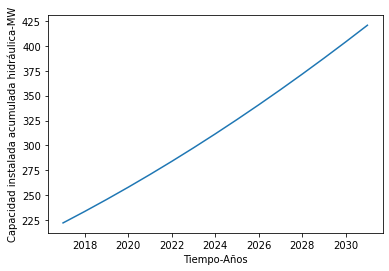

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('Tiempo-Años')
ax.set_ylabel('Capacidad instalada acumulada hidráulica-MW')
plt.show()

In [22]:
print(xy['Tasa de inversion en nueva capacidad h'])

2017.0    11.568434
2018.0    11.972064
2019.0    12.378658
2020.0    12.787375
2021.0    13.197322
2022.0    13.607549
2023.0    14.017059
2024.0    14.424805
2025.0    14.829697
2026.0    15.230605
2027.0    15.626364
2028.0    16.015781
2029.0    16.397637
2030.0    16.770700
2031.0    17.133726
Name: Tasa de inversion en nueva capacidad h, dtype: float64


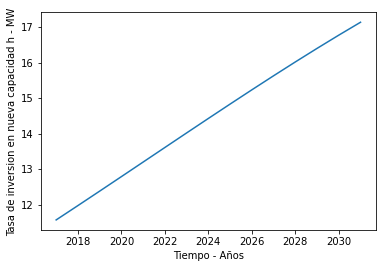

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['Tasa de inversion en nueva capacidad h'])
ax.set_xlabel('Tiempo - Años')
ax.set_ylabel('Tasa de inversion en nueva capacidad h - MW')
plt.show()

**2. Escenario 1**
---

Incentivo: FIT

In [26]:
import pysd
from google.colab import files
files.upload()

Saving E11.mdl to E11.mdl


{'E11.mdl': b'{UTF-8}\r\nCOPEX=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n\t)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t0\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FIT=\r

In [27]:
model= pysd.read_vensim('E11.mdl')

In [28]:
xy = model.run()

In [29]:
xy.head()

,TIME,COPEX,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,4089.240000,2017.0,15,222,0,0.22,5.376000e+07,0.0,67.530000,4.670880e+08,20.5,0.673,0.035,5.357690e+05,67.53,1,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.731,7.960906e+05,6403.56,0.0,5.376000e+07,0.09619,0.204509,0.00062,1415.000000,0.985039,39.533759,30,2031,2017,1,1
2018.0,2018.0,4893.997191,2018.0,15,222,0,0.22,6.555025e+07,0.0,69.893550,5.590103e+08,20.5,0.673,0.035,6.311787e+05,69.89354999999999,1,67.53,0.22,261.533759,6.531218e+07,18.42,2104000.0,0.0645,0.56,0.112,0.731,9.378584e+05,6403.56,51298.26745045289,6.555025e+07,0.09619,0.204509,0.00062,1375.466241,1.002782,45.918289,30,2031,2017,1,1
2019.0,2019.0,5843.468318,2019.0,15,222,0,0.22,7.975618e+07,0.0,72.339824,6.674624e+08,20.5,0.673,0.035,7.419967e+05,72.33982424999999,1,67.53,0.22,307.452048,7.798322e+07,18.42,2104000.0,0.0645,0.56,0.112,0.731,1.102521e+06,6403.56,388765.0060760868,7.975618e+07,0.09619,0.204509,0.00062,1329.547952,1.017586,52.789563,30,2031,2017,1,1
2020.0,2020.0,6951.950447,2020.0,15,222,0,0.22,9.672109e+07,0.0,74.871718,7.940773e+08,20.5,0.673,0.035,8.693976e+05,74.87171809874998,1,67.53,0.22,360.241612,9.277632e+07,18.42,2104000.0,0.0645,0.56,0.112,0.731,1.291824e+06,6403.56,866319.3523291135,9.672109e+07,0.09619,0.204509,0.00062,1276.758388,1.032798,60.135871,30,2031,2017,1,1
2021.0,2021.0,8233.820188,2021.0,15,222,0,0.22,1.168173e+08,0.0,77.492228,9.404972e+08,20.5,0.673,0.035,1.014528e+06,77.49222823220623,1,67.53,0.22,420.377482,1.098833e+08,18.42,2104000.0,0.0645,0.56,0.112,0.731,1.507471e+06,6403.56,1523655.1665522445,1.168173e+08,0.09619,0.204509,0.00062,1216.622518,1.048486,67.745735,30,2031,2017,1,1


In [30]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0     222.000000
2018.0     261.533759
2019.0     307.452048
2020.0     360.241612
2021.0     420.377482
2022.0     488.123217
2023.0     563.429502
2024.0     645.829680
2025.0     734.351368
2026.0     827.470355
2027.0     923.135090
2028.0    1018.882754
2029.0    1112.048657
2030.0    1200.042673
2031.0    1280.639357
Name: capacidad instalada acumulada hidráulica, dtype: float64


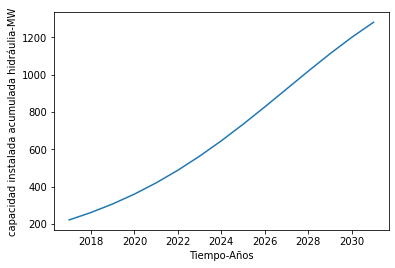

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('Tiempo-Años')
ax.set_ylabel('capacidad instalada acumulada hidráulia-MW')
plt.show()

In [34]:
print(xy['Tasa de inversion en nueva capacidad h'])

2017.0    39.533759
2018.0    45.918289
2019.0    52.789563
2020.0    60.135871
2021.0    67.745735
2022.0    75.306285
2023.0    82.400178
2024.0    88.521688
2025.0    93.118986
2026.0    95.664736
2027.0    95.747663
2028.0    93.165903
2029.0    87.994016
2030.0    80.596684
2031.0    71.576676
Name: Tasa de inversion en nueva capacidad h, dtype: float64


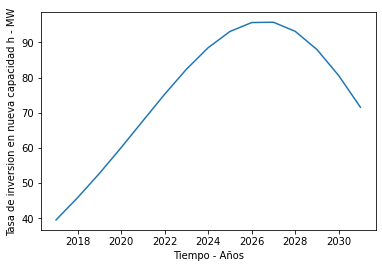

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['Tasa de inversion en nueva capacidad h'])
ax.set_xlabel('Tiempo - Años')
ax.set_ylabel('Tasa de inversion en nueva capacidad h - MW')


plt.show()

**3. Escenario 2**
---

Incentivo: Incentivo por reducción de emisiones de GEI

In [36]:
import pysd
from google.colab import files
files.upload()

Saving E222.mdl to E222.mdl


{'E222.mdl': b'{UTF-8}\r\nCOPEX=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n\t)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t1\r\n\t~\t\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FIT=\r\n\tPreci

In [37]:
model= pysd.read_vensim('E222.mdl')

In [38]:
xy = model.run()

In [39]:
xy.head()

,TIME,COPEX,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,4089.240000,2017.0,1,222,15,0.22,1.875332e+07,9.234869e+06,67.530000,4.670880e+08,20.5,0.673,0.035,615657.901824,20.5,0,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.84,9.147963e+05,7358.4,0.0,2.798819e+07,0.09619,0.204509,0.00062,1415.000000,0.512825,21.002183,30,2031,2017,1,1
2018.0,2018.0,4515.189363,2018.0,1,222,15,0.22,2.052747e+07,1.010853e+07,69.893550,5.157415e+08,20.5,0.673,0.035,673901.866182,20.5,0,67.53,0.22,243.002183,6.025685e+07,18.42,2104000.0,0.0645,0.56,0.112,0.84,1.001340e+06,7358.4,0.0,3.063600e+07,0.09619,0.204509,0.00062,1393.997817,0.508385,22.378259,30,2031,2017,1,1
2019.0,2019.0,4972.958460,2019.0,1,222,15,0.22,2.241786e+07,1.103943e+07,72.339824,5.680296e+08,20.5,0.673,0.035,735962.009750,20.5,0,67.53,0.22,265.380442,6.636595e+07,18.42,2104000.0,0.0645,0.56,0.112,0.84,1.093554e+06,7358.4,0.0,3.345729e+07,0.09619,0.204509,0.00062,1371.619558,0.504096,23.773411,30,2031,2017,1,1
2020.0,2020.0,5463.349261,2020.0,1,222,15,0.22,2.442611e+07,1.202837e+07,74.871718,6.240438e+08,20.5,0.673,0.035,801891.236938,20.5,0,67.53,0.22,289.153853,7.291040e+07,18.42,2104000.0,0.0645,0.56,0.112,0.84,1.191517e+06,7358.4,0.0,3.645448e+07,0.09619,0.204509,0.00062,1347.846147,0.499953,25.177584,30,2031,2017,1,1
2021.0,2021.0,5986.948916,2021.0,1,222,15,0.22,2.655297e+07,1.307572e+07,77.492228,6.838513e+08,20.5,0.673,0.035,871714.563736,20.5,0,67.53,0.22,314.331437,7.989802e+07,18.42,2104000.0,0.0645,0.56,0.112,0.84,1.295267e+06,7358.4,0.0,3.962869e+07,0.09619,0.204509,0.00062,1322.668563,0.495954,26.579537,30,2031,2017,1,1


In [40]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0    222.000000
2018.0    243.002183
2019.0    265.380442
2020.0    289.153853
2021.0    314.331437
2022.0    340.910974
2023.0    368.877912
2024.0    398.204422
2025.0    428.848634
2026.0    460.754113
2027.0    493.849613
2028.0    528.049153
2029.0    563.252425
2030.0    599.345586
2031.0    636.202395
Name: capacidad instalada acumulada hidráulica, dtype: float64


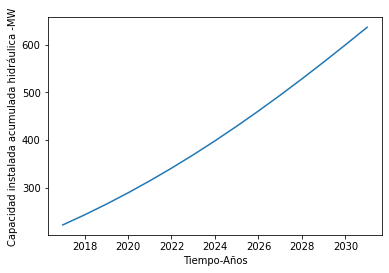

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('Tiempo-Años')
ax.set_ylabel('Capacidad instalada acumulada hidráulica -MW')
plt.show()

In [42]:
print(xy['Tasa de inversion en nueva capacidad h'])

2017.0    21.002183
2018.0    22.378259
2019.0    23.773411
2020.0    25.177584
2021.0    26.579537
2022.0    27.966938
2023.0    29.326510
2024.0    30.644212
2025.0    31.905479
2026.0    33.095501
2027.0    34.199539
2028.0    35.203273
2029.0    36.093160
2030.0    36.856809
2031.0    37.483327
Name: Tasa de inversion en nueva capacidad h, dtype: float64


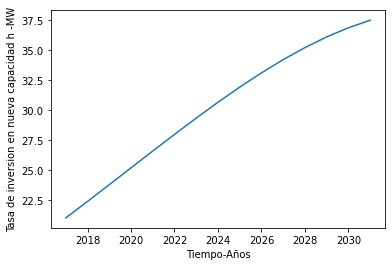

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['Tasa de inversion en nueva capacidad h'])
ax.set_xlabel('Tiempo-Años')
ax.set_ylabel('Tasa de inversion en nueva capacidad h -MW')
plt.show()

**4. Escenario 3** 

> Bloc con sangría


---
Escenario combinado 

In [44]:
import pysd
from google.colab import files
files.upload()

Saving E333.mdl to E333.mdl


{'E333.mdl': b'{UTF-8}\r\nCOPEX=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n\t)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t1\r\n\t~\t\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FIT=\r\n\tPreci

In [45]:
model= pysd.read_vensim('E333.mdl')

In [46]:
xy = model.run()

In [47]:
xy.head()

,TIME,COPEX,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,4089.240000,2017.0,1,222,15,0.22,6.104076e+07,9.124930e+06,67.530000,4.670880e+08,20.5,0.673,0.035,6.083286e+05,67.53,1,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.83,9.039059e+05,7270.8,3429623.5720138033,7.016569e+07,0.09619,0.204509,0.00062,1415.000000,1.209626,48.347423,30,2031,2017,1,1
2018.0,2018.0,5075.078972,2018.0,1,222,15,0.22,7.693599e+07,1.111217e+07,69.893550,5.796941e+08,20.5,0.673,0.035,7.408112e+05,69.89354999999999,1,67.53,0.22,270.347423,6.772879e+07,18.42,2104000.0,0.0645,0.56,0.112,0.83,1.100760e+06,7270.8,4469145.549195847,8.804816e+07,0.09619,0.204509,0.00062,1366.652577,1.219453,57.134051,30,2031,2017,1,1
2019.0,2019.0,6262.050362,2019.0,1,222,15,0.22,9.645715e+07,1.346056e+07,72.339824,7.152744e+08,20.5,0.673,0.035,8.973710e+05,72.33982424999999,1,67.53,0.22,327.481474,8.356935e+07,18.42,2104000.0,0.0645,0.56,0.112,0.83,1.333389e+06,7270.8,5795260.911783647,1.099177e+08,0.09619,0.204509,0.00062,1309.518526,1.229905,66.703681,30,2031,2017,1,1
2020.0,2020.0,7673.168170,2020.0,1,222,15,0.22,1.201678e+08,1.620231e+07,74.871718,8.764574e+08,20.5,0.673,0.035,1.080154e+06,74.87171809874998,1,67.53,0.22,394.185155,1.024012e+08,18.42,2104000.0,0.0645,0.56,0.112,0.83,1.604983e+06,7270.8,7471473.589088314,1.363702e+08,0.09619,0.204509,0.00062,1242.814845,1.241078,76.727494,30,2031,2017,1,1
2021.0,2021.0,9324.908218,2021.0,1,222,15,0.22,1.485829e+08,1.935606e+07,77.492228,1.065125e+09,20.5,0.673,0.035,1.290404e+06,77.49222823220623,1,67.53,0.22,470.912649,1.244443e+08,18.42,2104000.0,0.0645,0.56,0.112,0.83,1.917391e+06,7270.8,9566762.582692228,1.679389e+08,0.09619,0.204509,0.00062,1166.087351,1.253085,86.686436,30,2031,2017,1,1


In [48]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0     222.000000
2018.0     270.347423
2019.0     327.481474
2020.0     394.185155
2021.0     470.912649
2022.0     557.599085
2023.0     653.464428
2024.0     756.858569
2025.0     865.211720
2026.0     975.153374
2027.0    1082.830891
2028.0    1184.393924
2029.0    1276.536009
2030.0    1356.941680
2031.0    1424.510950
Name: capacidad instalada acumulada hidráulica, dtype: float64


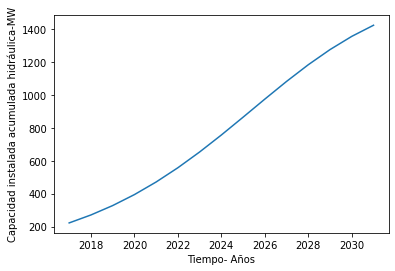

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('Tiempo- Años')
ax.set_ylabel('Capacidad instalada acumulada hidráulica-MW')
plt.show()

In [51]:
print(xy['Tasa de inversion en nueva capacidad h'])

2017.0     48.347423
2018.0     57.134051
2019.0     66.703681
2020.0     76.727494
2021.0     86.686436
2022.0     95.865343
2023.0    103.394141
2024.0    108.353151
2025.0    109.941654
2026.0    107.677516
2027.0    101.563034
2028.0     92.142084
2029.0     80.405671
2030.0     67.569270
2031.0     54.806494
Name: Tasa de inversion en nueva capacidad h, dtype: float64


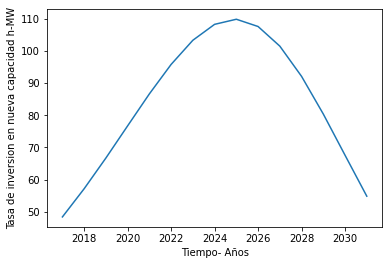

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['Tasa de inversion en nueva capacidad h'])
ax.set_xlabel('Tiempo- Años')
ax.set_ylabel('Tasa de inversion en nueva capacidad h-MW')
plt.show()

# **Evaluación comparativa de resultados**

In [53]:
import pysd
from google.colab import files
files.upload()

Saving E333.mdl to E333 (1).mdl
Saving E222.mdl to E222 (1).mdl
Saving E11.mdl to E11 (1).mdl
Saving CasoBase1111.mdl to CasoBase1111 (1).mdl


{'CasoBase1111.mdl': b'{UTF-8}\r\nCOPEX=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada)^-"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nHoras de generaci\xc3\xb3n=\r\n\tFlujo de utilizaci\xc3\xb3n de enrg\xc3\xada hidr\xc3\xa1ulica*8760\r\n\t~\th\r\n\t~\t\t|\r\n\r\nFlujo de utilizaci\xc3\xb3n de enrg\xc3\xada hidr\xc3\xa1ulica=\r\n\t0.666\r\n\t~\t\r\n\t~\t\t|\r\n\r\nGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica=\r\n\tcapacidad instalada acumulada hidr\xc3\xa1ulica*factor de planta*Horas de generaci\xc3\xb3n\r\n\t~\tMWh\r\n\t~\t\t|\r\n\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t0\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\

In [54]:
model= pysd.read_vensim('CasoBase1111.mdl')
model1= pysd.read_vensim('E11.mdl')
model2= pysd.read_vensim('E222.mdl')
model3= pysd.read_vensim('E333.mdl')

In [55]:
xy = model.run()
x1y1 = model1.run()
x2y2 = model2.run()
x3y3 = model3.run()

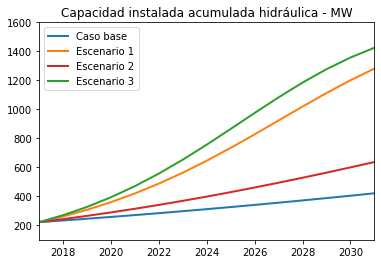

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) 
ax.plot(xy['TIME'],xy['capacidad instalada acumulada hidráulica'], color ='tab:blue', linewidth=2, linestyle='-', label = 'Caso base') 
ax.plot(x1y1['TIME'], x1y1['capacidad instalada acumulada hidráulica'], color ='tab:orange', linewidth=2, linestyle='-', label = 'Escenario 1') 
ax.plot(x2y2['TIME'], x2y2['capacidad instalada acumulada hidráulica'], color ='tab:red', linewidth=2, linestyle='-', label = 'Escenario 2')
ax.plot(x3y3['TIME'], x3y3['capacidad instalada acumulada hidráulica'], color ='tab:green', linewidth=2, linestyle='-', label = 'Escenario 3')

ax.set_xlim([2017, 2031]) 
ax.set_ylim([100, 1600])

ax.set_title('Capacidad instalada acumulada hidráulica - MW') 
  
plt.legend(loc='upper left') 
plt.show()

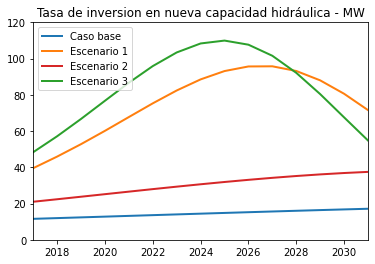

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) 
ax.plot(xy['TIME'],xy['Tasa de inversion en nueva capacidad h'], color ='tab:blue', linewidth=2, linestyle='-', label = 'Caso base') 
ax.plot(x1y1['TIME'], x1y1['Tasa de inversion en nueva capacidad h'], color ='tab:orange', linewidth=2, linestyle='-', label = 'Escenario 1') 
ax.plot(x2y2['TIME'], x2y2['Tasa de inversion en nueva capacidad h'], color ='tab:red', linewidth=2, linestyle='-', label = 'Escenario 2')
ax.plot(x3y3['TIME'], x3y3['Tasa de inversion en nueva capacidad h'], color ='tab:green', linewidth=2, linestyle='-', label = 'Escenario 3')

ax.set_xlim([2017, 2031]) 
ax.set_ylim([0, 120])

ax.set_title('Tasa de inversion en nueva capacidad hidráulica - MW') 
  
plt.legend(loc='upper left') 
plt.show()